lab1-1: 기본 회로 & 시각화

[텍스트 회로도]
0: ──RX(1.047)─┤  <Z>


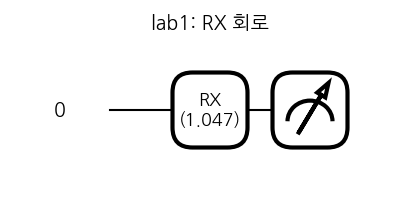


해석적 결과: 0.500000
이론값 cos(theta): 0.500000
오차: 1.11e-16

lab1-2: Shots vs Analytic
  shots=     10  ->  <Z> = +0.600000  (오차 0.1000)
  shots=    100  ->  <Z> = +0.400000  (오차 0.1000)
  shots=   1000  ->  <Z> = +0.470000  (오차 0.0300)
  shots=  10000  ->  <Z> = +0.497000  (오차 0.0030)


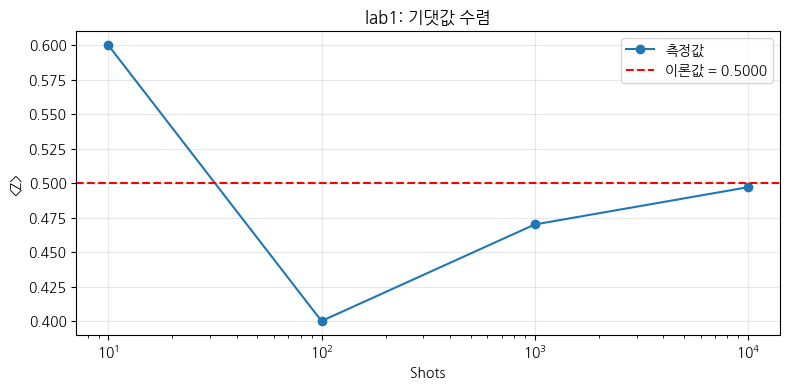

In [2]:
"""
lab1: 회로 생성과 실행
- QNode 생성, 텍스트/matplotlib 회로 시각화
- Shots vs Analytic 비교, log-log 오차 플롯
"""

# !pip install pennylane koreanize_matplotlib

import pennylane as qml
from pennylane import numpy as np
import numpy as std_np
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings("ignore")

SEED = 1234

# ===== 학생 수정 =====
theta = np.pi / 3
# 범위: 0 ~ 2pi
# 추천: pi/6, pi/4, pi/2, pi
# ======================

# ===== 학생 수정 =====
shot_counts = [10, 100, 1000, 10000]
# 추천: 10 -> 흔들림 큼 / 10000 -> 안정
# ======================

theory = np.cos(theta)
dev = qml.device("default.qubit", wires=1)

# ===========================================================
#  1-1: 기본 회로 실행 & 시각화
# ===========================================================

print("=" * 60)
print("lab1-1: 기본 회로 & 시각화")
print("=" * 60)

@qml.qnode(dev)
def basic_circuit(angle):
    qml.RX(angle, wires=0)
    return qml.expval(qml.PauliZ(0))

print("\n[텍스트 회로도]")
print(qml.draw(basic_circuit, decimals=3)(theta))

fig, ax = qml.draw_mpl(basic_circuit, decimals=3, style="black_white")(theta)
fig.suptitle("lab1: RX 회로", fontsize=14)
plt.tight_layout()
plt.show()

result = basic_circuit(theta)
print(f"\n해석적 결과: {float(result):.6f}")
print(f"이론값 cos(theta): {theory:.6f}")
print(f"오차: {abs(float(result) - theory):.2e}")

# ===========================================================
#  1-2: Shots vs Analytic
# ===========================================================

print("\n" + "=" * 60)
print("lab1-2: Shots vs Analytic")
print("=" * 60)

@qml.qnode(dev)
def circ_shots(angle):
    qml.RX(angle, wires=0)
    return qml.expval(qml.PauliZ(0))

results_by_shots = {}
errors = {}

for s in shot_counts:
    val = float(circ_shots(theta, shots=s))
    results_by_shots[s] = val
    errors[s] = abs(val - theory)
    print(f"  shots={s:>7d}  ->  <Z> = {val:+.6f}  (오차 {errors[s]:.4f})")

# 그림1: 기댓값 수렴
fig, ax = plt.subplots(figsize=(8, 4))
ax.semilogx(list(results_by_shots.keys()),
            list(results_by_shots.values()), "o-", label="측정값")
ax.axhline(y=theory, color="r", ls="--", label=f"이론값 = {theory:.4f}")
ax.set_xlabel("Shots")
ax.set_ylabel("<Z>")
ax.set_title("lab1: 기댓값 수렴")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
